# k-means

In [1]:
import csv
import os
import numpy as np
import math
from copy import deepcopy
from matplotlib import pyplot as plt
kluster=3

In [10]:
#read csv file in a specific directory
def read():
    path=r'G:\My Drive\Thesis\Python Scripts\K means'
    os.chdir(path)
    scv='iris.csv'
    with open(scv) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        feature=[]
        for row in readCSV:
            attribute=row
            feature.append(attribute)
    del(feature[0])
    for i in range (len (feature)):
        del(feature[i][-1])
    newListSet=[]
    for i in range(len(feature)):
        newList=[]
        for j in range(len (feature[i])):
            convert=float(feature[i][j])
            newList.append(convert)
        newListSet.append(newList)
    return newListSet

In [11]:
def centeroid():
    data=read()
    average=np.mean(data, axis=0)
    stdev=np.std(data, axis=0)
    randCenter=[]
    for i in range(kluster):
        center=[]
        for j in range(len(data[0])):
            rand=np.random.uniform(0,1)
            center.append(average[j]+stdev[j]*rand)
        randCenter.append(center)
    return randCenter

In [21]:
def benchmark():
    d=r"G:\My Drive\Thesis\Python Scripts\K means"
    os.chdir(d)
    scv='iris.csv'
    with open(scv) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        feature=[]
        for row in readCSV:
            attribute=row[4]
            feature.append(attribute)
    del(feature[0])
    for i in range(len(feature)):
        if feature[i]=='Setosa':
            feature[i]=[0]
        if feature[i]=='Versicolor':
            feature[i]=[1]
        if feature[i]=='Virginica':
            feature[i]=[2]
    return feature

In [22]:
def evaluation(center):
    data=read()
    setDistant=[]
    for i in range (len(data)):
        distant=[]
        for j in range (kluster):
            setDistance=[]
            for k in range (len(data[0])):
                distance=(data[i][k]-center[j][k])**2
                setDistance.append(distance)
            distanceCalc=math.sqrt(sum(setDistance))
            distant.append(distanceCalc)
        setDistant.append(distant)
    return setDistant

In [23]:
def stoppingCriterion(array1, array2):
    error=0
    for i in range (len(array2)):
        for j in range(len(array2[0])):
            err=(array2[i][j]-array1[i][j])**2
            error+=err
    error= math.sqrt(error)
    return error

In [24]:
#plotting data before k-means
data=read()
colors=['orange','blue','green']
centers=centeroid()
#centers=[[5.7, 3.4, 4.2, 1.3], [7.3, 2.9, 6.3, 0.1], [6.9, 3.1, 5.1, 1.5]]
category=benchmark()

In [25]:
def main():
    data=read()
    oldCenter=np.zeros((3,4))
    newCenter=deepcopy(centers)
    error=stoppingCriterion(oldCenter, newCenter)
    iteration=0
    while error!=0:
        iteration+=1
        print('Iteration {}'.format(iteration))
        evaluate=evaluation(newCenter)
        min_index=[]
        for i in range(len (evaluate)):
            idx=evaluate[i].index(min(evaluate[i]))
            min_index.append(idx)
        oldCenter=deepcopy(newCenter)
        #making average of data for every cluster, 4x3
        cluster1=[]
        cluster2=[]
        cluster3=[]
        for i in range (len (data)):
            if min_index[i]==0:
                cluster1.append(data[i])
            elif min_index[i]==1:
                cluster2.append(data[i])
            else:
                cluster3.append(data[i])
        avg1=np.mean(cluster1, axis=0)
        avg2=np.mean(cluster2, axis=0)
        avg3=np.mean(cluster3, axis=0)
        newCenter=[avg1, avg2, avg3]
        error=stoppingCriterion(oldCenter, newCenter)
    return min_index, newCenter

In [26]:
kmeans=main()
minIndex=kmeans[0]
min_index=[]
for i in range(len(minIndex)):
    min_index.append([minIndex[i]])
newCenter=kmeans[1]

Iteration 1
Iteration 2
Iteration 3
Iteration 4


In [27]:
for i in range (len(minIndex[0:50])):
        accuracy11=minIndex[0:50].count(0)
        accuracy12=minIndex[0:50].count(1)
        accuracy13=minIndex[0:50].count(2)
for j in range (len(minIndex[50:100])):   
    accuracy21=minIndex[50:100].count(0)
    accuracy22=minIndex[50:100].count(1)
    accuracy23=minIndex[50:100].count(2)
for k in range (len(minIndex[100:150])):
    accuracy31=minIndex[100:150].count(0)
    accuracy32=minIndex[100:150].count(1)
    accuracy33=minIndex[100:150].count(2)
accuracy=[max(accuracy11,accuracy12,accuracy13),
          max(accuracy21,accuracy22,accuracy23),
          max(accuracy31,accuracy32,accuracy33)]
accuracy_detail=[[accuracy11,accuracy12,accuracy13],
                 [accuracy21,accuracy22,accuracy23],
                 [accuracy31,accuracy32,accuracy33]]
accurate=sum(accuracy)/len(data)*100
print('---------------Accuracy is {}%-----------------'.format(accurate))

---------------Accuracy is 88.66666666666667%-----------------


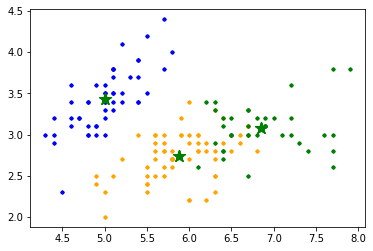

In [32]:
for k in range (len(data)):
    for l in range (len(data[0])):
        plt.scatter(data[k][0], data[k][1], s=7, color = colors[int(min_index[k][0])])
for m in range (int(kluster))  :
    for n in range(len(data[0])):
        plt.scatter(newCenter[m][0],newCenter[m][1], marker='*',c='g',s=150)